In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from oscovida.regions import Region
import oscovida.statistics as statistics

In [3]:
import oscovida.original.statistics

In [4]:
region = Region('DEU')
region.data

,id,tests,confirmed,recovered,deaths,hosp,vent,icu,population,school_closing,...,currency,administrative_area_level,administrative_area_level_1,administrative_area_level_2,administrative_area_level_3,latitude,longitude,key,key_apple_mobility,key_google_mobility
date,,,,,,,,,,,,,,,,,,,,,
2020-01-04,DEU,0,0,0,0,0,0,0,82905782,0,...,EUR,1,Germany,NaN,NaN,51.0,9.0,NaN,Germany,DE
2020-01-05,DEU,0,0,0,0,0,0,0,82905782,0,...,EUR,1,Germany,NaN,NaN,51.0,9.0,NaN,Germany,DE
2020-01-06,DEU,0,0,0,0,0,0,0,82905782,0,...,EUR,1,Germany,NaN,NaN,51.0,9.0,NaN,Germany,DE
2020-01-07,DEU,0,0,0,0,0,0,0,82905782,0,...,EUR,1,Germany,NaN,NaN,51.0,9.0,NaN,Germany,DE
2020-01-08,DEU,0,0,0,0,0,0,0,82905782,0,...,EUR,1,Germany,NaN,NaN,51.0,9.0,NaN,Germany,DE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-09,DEU,8586648,216928,199441,9211,0,0,0,82905782,2,...,EUR,1,Germany,NaN,NaN,51.0,9.0,NaN,Germany,DE
2020-08-10,DEU,8586648,217979,199462,9211,0,0,0,82905782,2,...,EUR,1,Germany,NaN,NaN,51.0,9.0,NaN,Germany,DE
2020-08-11,DEU,8586648,219079,199479,9211,0,0,0,82905782,2,...,EUR,1,Germany,NaN,NaN,51.0,9.0,NaN,Germany,DE


# `statistics.daily`

In [5]:
data = region.data.confirmed

In [6]:
(
    (daily_original, _),
    (daily_original_sw, _),
    (daily_original_ss, _),
) = oscovida.original.statistics.compute_daily_change(data)


In [7]:
daily_refactor = data.pipe(statistics.daily)
all(daily_refactor.to_numpy() == daily_original.to_numpy()) #  TODO: Refactor has additional element at start for some reason?

True

In [8]:
daily_refactor_sw = data.pipe(statistics.daily).pipe(statistics.smooth)
all(daily_refactor_sw.to_numpy() == daily_original_sw.to_numpy())

True

In [9]:
daily_refactor_ss = data.pipe(statistics.daily).pipe(statistics.smooth, kind='strong')
all(daily_refactor_ss.to_numpy() == daily_original_ss.to_numpy())

True

# `statistics.doubling_time`

In [10]:
(
    (dtime_original, _),
    (dtime_original_s, _)
) = oscovida.original.statistics.compute_doubling_time(data)

In [11]:
dtime_refactor = data.pipe(statistics.doubling_time)

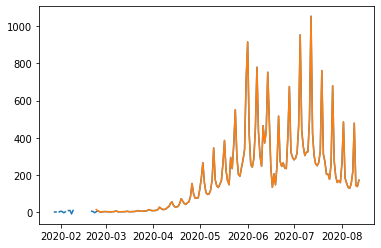

In [12]:
plt.plot(dtime_original)
plt.plot(dtime_refactor)

In [13]:
dtime_refactor_s = data.pipe(statistics.smooth, kind='7dayrolling').pipe(statistics.doubling_time, minchange=20)

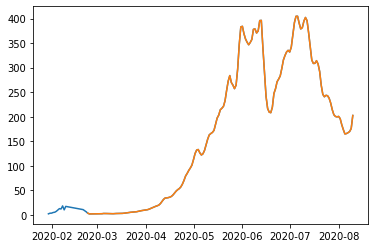

In [14]:
plt.plot(dtime_original_s)
plt.plot(dtime_refactor_s)

# `statistics.r_number`

In [15]:
r_original = oscovida.original.statistics.compute_R(data)

In [16]:
r_refactor = data.pipe(statistics.r_number)

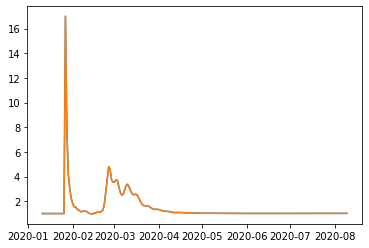

In [17]:
plt.plot(r_original)
plt.plot(r_refactor)

In [18]:
all(r_original.dropna() == r_refactor.dropna())

True

# `statistics.min_max`

In [19]:
(
    original_min_final, original_max_final
) = oscovida.original.statistics.min_max_in_past_n_days(data, 10)

In [20]:
original_min_final, original_max_final

(0.75, 219964.1)

In [21]:
data.pipe(statistics.min_max, n=10)

(0.75, 219964.1)

# Plotting

In [22]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import FuncFormatter, ScalarFormatter


# choose font - can be deactivated
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Inconsolata']

# need many figures for index.ipynb and germany.ipynb
rcParams['figure.max_open_warning'] = 50

plt.style.use('ggplot')


In [23]:
from oscovida import plots

## totals

In [24]:
region = Region('USA')
data = region.data

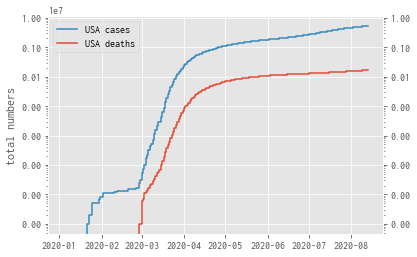

In [25]:
plots.plot_totals(data.confirmed, label_prepend="USA")
plots.plot_totals(data.deaths, label_prepend="USA")

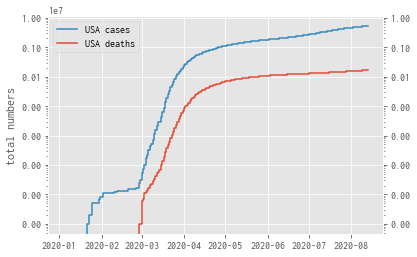

In [26]:
plots.plot_totals(region)

## daily change

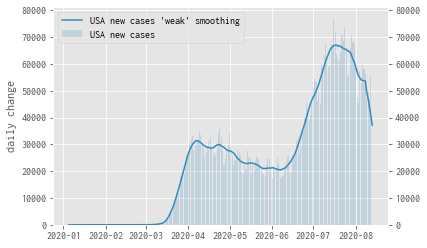

In [27]:
plots.plot_daily(
    region.data.confirmed,
    label_prepend="USA"
)

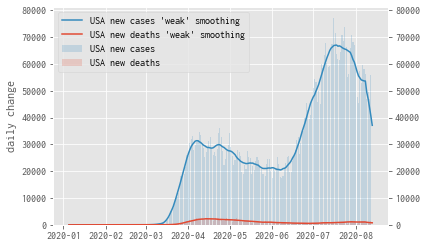

In [28]:
ax = plots.plot_daily(
    region
)

## r number

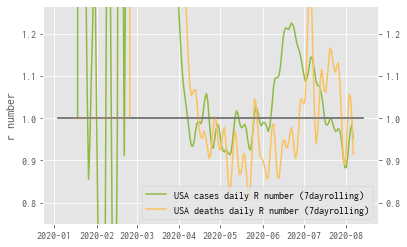

In [29]:
plots.plot_r_number(
    region.data.confirmed,
    label_prepend="USA"
)

plots.plot_r_number(
    region.data.deaths,
    label_prepend="USA"
)

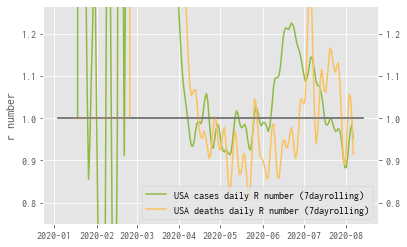

In [30]:
plots.plot_r_number(region)

## growth factor

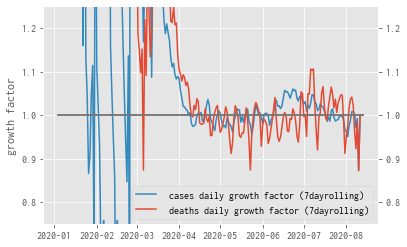

In [31]:
plots.plot_growth_factor(data.confirmed)
plots.plot_growth_factor(data.deaths)

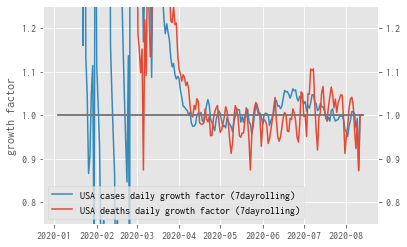

In [32]:
plots.plot_growth_factor(region)

## doubling time

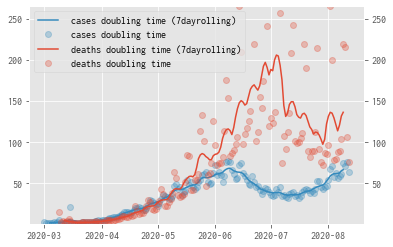

In [33]:
plots.plot_doubling_time(data.confirmed)
plots.plot_doubling_time(data.deaths)

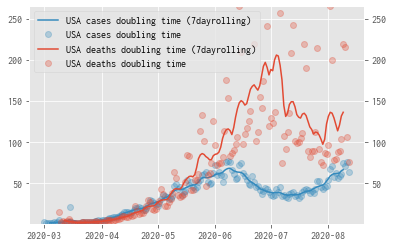

In [34]:
plots.plot_doubling_time(region)

---

# Misc

#### Neat way to pass a tuple of functions off to be piped with pandas

In [35]:
from functools import reduce

In [36]:
pipe_chain = (statistics.daily, statistics.smooth, statistics.r_number)

In [37]:
(
    data.deaths
    .pipe(statistics.daily)
    .pipe(statistics.smooth)
    .pipe(statistics.r_number)
)

date
2020-01-05         NaN
2020-01-06         NaN
2020-01-07         NaN
2020-01-08         NaN
2020-01-09         NaN
                ...   
2020-08-09    0.797567
2020-08-10         NaN
2020-08-11         NaN
2020-08-12         NaN
2020-08-13         NaN
Name: deaths, Length: 222, dtype: float64

In [38]:
reduce(lambda a, b: a.pipe(b), pipe_chain, data.deaths)

date
2020-01-05         NaN
2020-01-06         NaN
2020-01-07         NaN
2020-01-08         NaN
2020-01-09         NaN
                ...   
2020-08-09    0.797567
2020-08-10         NaN
2020-08-11         NaN
2020-08-12         NaN
2020-08-13         NaN
Name: deaths, Length: 222, dtype: float64